# **IDVE ASSIGNMENT 3**


### **Kulile Bhotile**: 2104349
### **Thabelang Ncube**: 1918469
### **Lindelani Dlamini**: 1898593
### **Lindani Dlamini**: 1712359
### **Pamela Segana**: 2265335

# **Mount Drive**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap_learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap_learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=b2f93ebd8531a44b759d85346eec0c569ace59b24aab8a32874068b579a1c21e
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=d38631d676b7b8164127d2e27b12710c8057a9f6ee63fb012423fad967abec77
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap_learn pynndescent


# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import umap

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


# **Read in dataset**

In [ ]:
salaries = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Assignment 3/nba_salaries.csv", low_memory=False)
salaries.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
salaries

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,...,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,minayju01
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,...,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,simmoko01
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,...,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,yorkga01
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,...,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,grayra01


In [ ]:
all_stats = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Assignment 3/nba_2022-23_all_stats_with_salary.csv", low_memory=False)
all_stats.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
all_stats

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,...,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,...,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,...,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,...,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


# **Preliminary Analysis**

In [ ]:
df = all_stats.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,467.0,8.416599e+06,1.070812e+07,5849.000,1.782621e+06,3.722040e+06,1.063354e+07,4.807001e+07
Age,467.0,2.582013e+01,4.275113e+00,19.000,2.300000e+01,2.500000e+01,2.900000e+01,4.200000e+01
GP,467.0,4.823340e+01,2.480774e+01,1.000,3.100000e+01,5.500000e+01,6.850000e+01,8.300000e+01
GS,467.0,2.265096e+01,2.709458e+01,0.000,1.000000e+00,8.000000e+00,4.550000e+01,8.300000e+01
MP,467.0,1.987131e+01,9.548684e+00,1.800,1.250000e+01,1.920000e+01,2.830000e+01,4.100000e+01
FG,467.0,3.351392e+00,2.457836e+00,0.000,1.600000e+00,2.700000e+00,4.300000e+00,1.120000e+01
FGA,467.0,7.117773e+00,5.020700e+00,0.000,3.300000e+00,5.800000e+00,9.400000e+00,2.220000e+01
FG%,466.0,4.650086e-01,1.095467e-01,0.000,4.170000e-01,4.550000e-01,5.075000e-01,1.000000e+00
3P,467.0,9.965739e-01,8.804682e-01,0.000,3.000000e-01,8.000000e-01,1.500000e+00,4.900000e+00
3PA,467.0,2.792719e+00,2.260794e+00,0.000,1.000000e+00,2.400000e+00,4.150000e+00,1.140000e+01


Above is the statistical destribution of numerical features

In [ ]:
lst = df.columns[df.isna().any()].tolist()
for x,y in enumerate(lst):
  print(x, y)

0 FG%
1 3P%
2 2P%
3 eFG%
4 FT%
5 TS%
6 3PAr
7 FTr


We have 8 columns which are not numericals, these cant be used as they are in dimensionally reduction. if we want to include them we will need to encode them.

<ipython-input-15-3e788e4e3ca5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True, color='b')


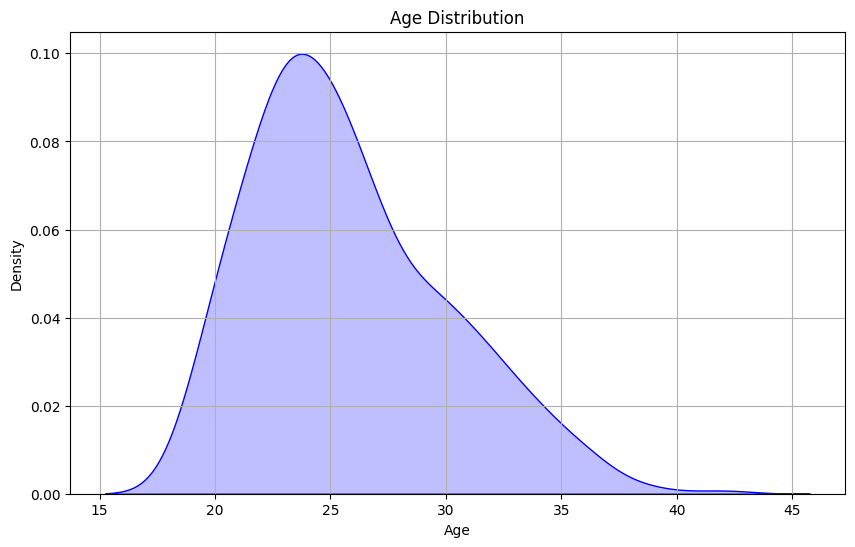

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'], shade=True, color='b')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

- **Youth Focus:** The right-skewed distribution suggests a prevalence of younger players in the NBA, highlighting the emphasis on developing and showcasing youthful talent.
- **Early Impact:** The distribution underscores the impact of young players who enter the league and make significant contributions early in their careers, often becoming key players for their teams.
- **Longevity of Players:** Despite being less frequent, the presence of older players indicates the experience and skill of athletes who maintain competitive performance into their 30s and 40s, serving as mentors and leaders for their younger teammates.

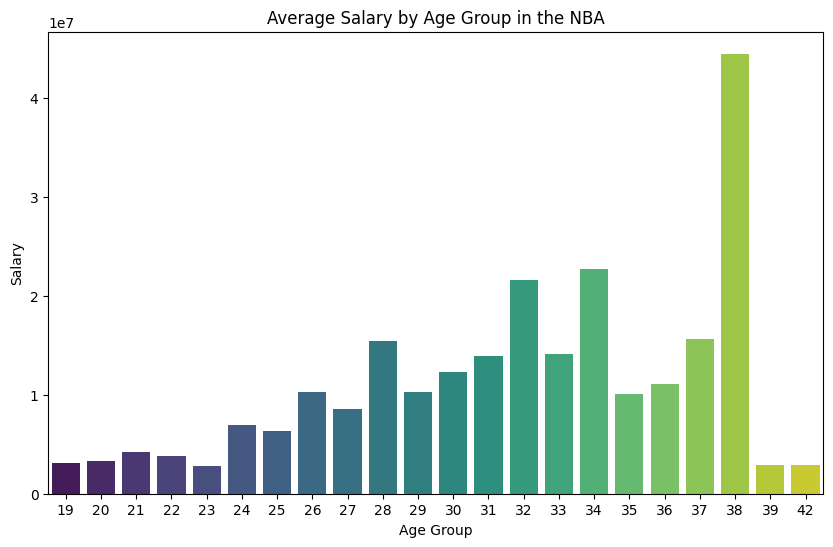

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Salary', data=df, errorbar=None, estimator=np.mean, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Salary')
plt.title('Average Salary by Age Group in the NBA')
plt.show()

- **Early Career Growth:** Salaries show a gradual increase for players aged 19-27, reflecting their initial development and rising value in the league.
- **Peak Earning Years:** The highest average salaries are seen in the 28-37 age group, indicating the prime career phase when players are highly valued for their skills and experience.
- **Outlier for Elite Players:** The outlier at age 38 signifies exceptionally high salaries for elite players who maintain exceptional performance and leadership qualities.
- **Decline in Later Years:** Salaries decline for players aged 39-45, suggesting reduced value due to age-related performance decline and potential injuries.

In [ ]:
df.head()

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


# **Handling Missing Values**

In [ ]:
nba_stats_df = all_stats.copy()
nba_salaries_df = salaries.copy()

In [ ]:
missing_data = nba_stats_df.isnull().sum()
missing_data_percentage = (nba_stats_df.isnull().sum() / len(nba_stats_df)) * 100

missing_data_overview = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_data_percentage
}).sort_values(by='Percentage (%)', ascending=False)

missing_data_overview

,Missing Values,Percentage (%)
FT%,23,4.925054
3P%,13,2.783726
2P%,4,0.856531
TS%,1,0.214133
3PAr,1,0.214133
FTr,1,0.214133
FG%,1,0.214133
eFG%,1,0.214133
Player Name,0,0.000000
AST%,0,0.000000


In the NBA statistics dataset (nba_2022-23_all_stats_with_salary.csv):

    FG% (Field Goal Percentage): 1 missing value
    3P% (Three-Point Field Goal Percentage): 13 missing values
    2P% (Two-Point Field Goal Percentage): 4 missing values
    eFG% (Effective Field Goal Percentage): 1 missing value
    FT% (Free Throw Percentage): 23 missing values
    TS% (True Shooting Percentage): 1 missing value
    3PAr (Three-Point Attempt Rate): 1 missing value
    FTr (Free Throw Attempt Rate): 1 missing value

In [ ]:
missing_data = nba_salaries_df.isnull().sum()
missing_data_percentage = (nba_salaries_df.isnull().sum() / len(nba_salaries_df)) * 100

missing_data_overview = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_data_percentage
}).sort_values(by='Percentage (%)', ascending=False)

missing_data_overview

,Missing Values,Percentage (%)
FT%,23,4.925054
3P%,13,2.783726
2P%,4,0.856531
FG%,1,0.214133
eFG%,1,0.214133
DRB,0,0.000000
FT,0,0.000000
FTA,0,0.000000
ORB,0,0.000000
Player Name,0,0.000000


In the NBA salaries dataset (nba_salaries.csv):

    FG%: 1 missing value
    3P%: 13 missing values
    2P%: 4 missing values
    eFG%: 1 missing value
    FT%: 23 missing values

 The `nba_salaries.csv` file appears to be a subset of the `nba_2022-23_all_stats_with_salary.csv` file, as they share the same missing values and have similar information.


 Given the small number of missing values relative to typical sizes of such datasets, we will consider **Median Imputation** for the percentage columns, especially since they are derived from other columns (e.g., FG% is derived from FG and FGA). Lets confirm our assumption of missing at random (MAR) by first investigating the pattern of missingness in the data.


There are several methods to handle missing data, and each method has its advantages and disadvantages depending on the nature of the data and the amount of missingness.


**Single Imputation Methods:**

***Why we used median:*** It's a straightforward approach and provides a quick and easy way to maintain the size of the dataset. We chose median because it is less affected by outliers than the mean and is more suitable for skewed distributions, which is often the case with percentage stats in sports data.

**Multiple Imputation:**

***Why we didn't use it:*** It's more complex and is often overkill for exploratory analysis or visualization purposes. It's primarily used for inferential statistics where the uncertainty of the imputations needs to be reflected in the results.

**Regression Imputation:**

***Why we didn't use it:*** It can introduce bias if the model is not well-specified or if the data does not meet the assumptions of the chosen regression model.

**K-Nearest Neighbors (KNN) Imputation:**

***Why we didn't use it:*** While it is a sophisticated method that takes into account the similarity between observations, it can be computationally intensive, and without a clear indication that the missing data relates to observable dimensions, it might not provide a significant advantage over median imputation.

**Expectation-Maximization (EM) Imputation:**

***Why we didn't use it:*** Like multiple imputation, EM is complex and more appropriate for datasets where the precise estimation of missing values is critical for subsequent statistical analysis.

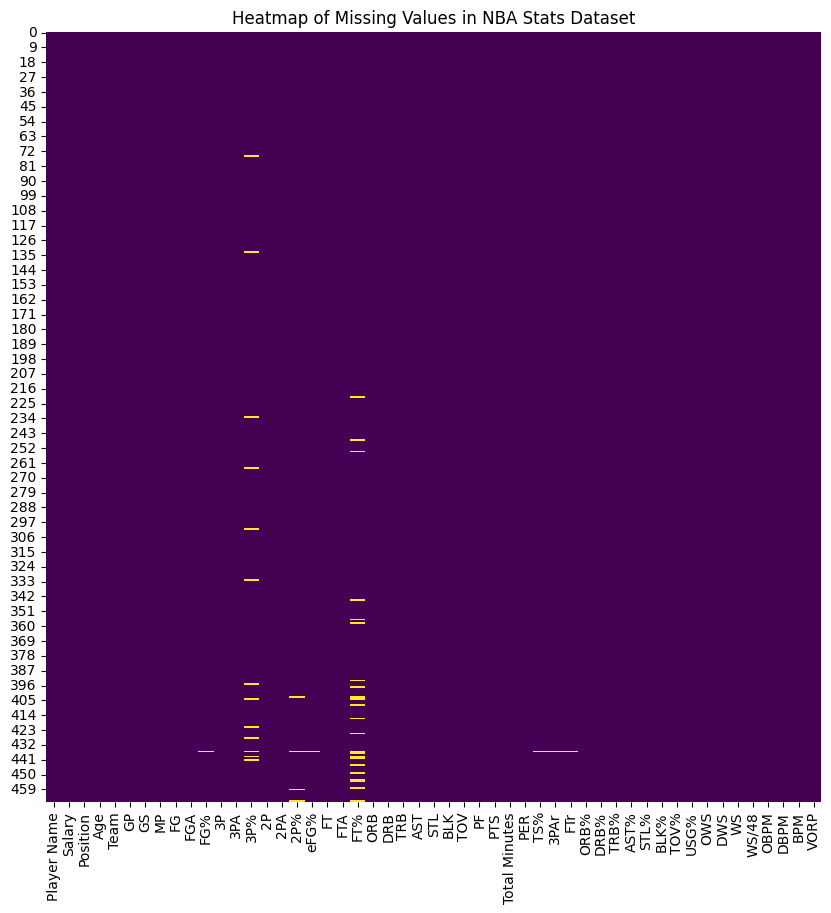

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(nba_stats_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in NBA Stats Dataset')
plt.show()

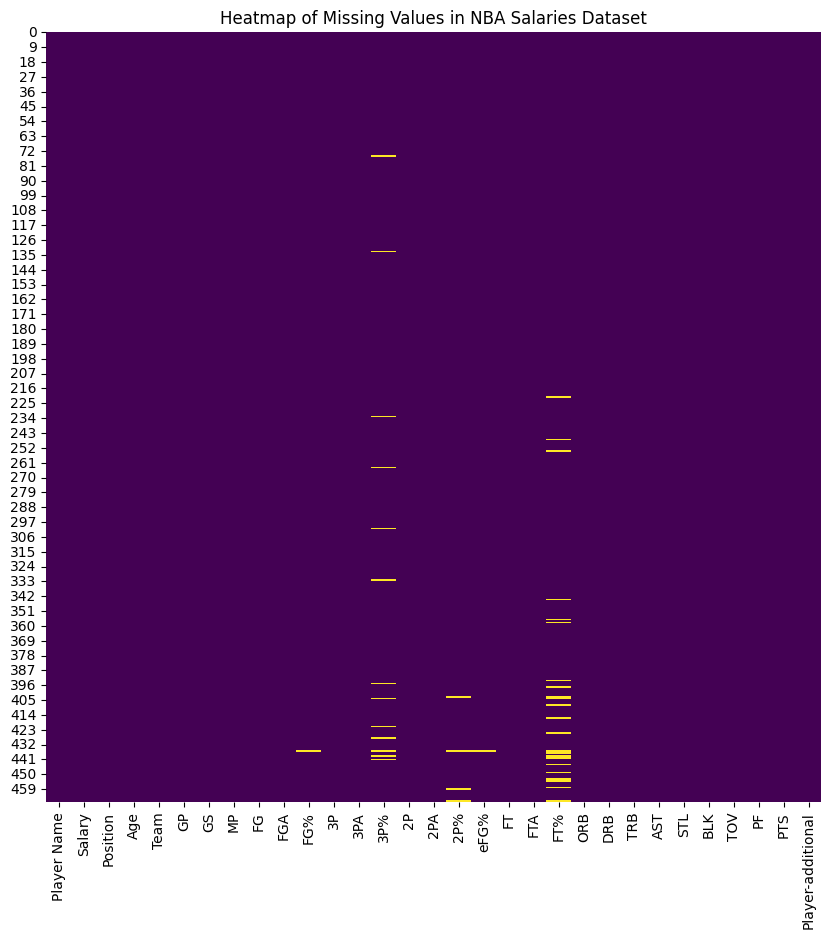

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(nba_salaries_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in NBA Salaries Dataset')
plt.show()

The heatmaps display the missing data for each dataset. Each column represents a feature, and each row represents an observation (player). The yellow lines indicate missing values.


From the visualization, it's evident that missing values are sparse and seem to be randomly distributed across different observations. This supports our assumption that the data is missing at random (MAR), especially since the columns with missing values are derived statistics that could feasibly be missing due to reasons unrelated to the underlying value (e.g., a player who has taken very few shots may not have a meaningful shooting percentage).


Given this analysis and considering the simplicity of our visualization tasks, mean/median imputation will be sufficient for the missing values. **Median imputation** is generally robust to outliers and could generally be preferred for percentage columns.

In [ ]:
columns_to_impute = ['FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TS%', '3PAr', 'FTr']
for column in columns_to_impute:
    nba_stats_df[column].fillna(nba_stats_df[column].median(), inplace=True)

missing_values_after_specific_imputation = nba_stats_df[columns_to_impute].isnull().sum()

nba_stats_df[columns_to_impute].head()

,FG%,3P%,2P%,eFG%,FT%,TS%,3PAr,FTr
0,0.493,0.427,0.579,0.614,0.915,0.656,0.564,0.248
1,0.408,0.303,0.459,0.457,0.681,0.498,0.322,0.334
2,0.436,0.311,0.487,0.481,0.656,0.513,0.289,0.317
3,0.500,0.321,0.580,0.549,0.768,0.583,0.309,0.268
4,0.560,0.404,0.617,0.614,0.919,0.677,0.267,0.387


In [ ]:
columns_to_impute = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']
for column in columns_to_impute:
    nba_salaries_df[column].fillna(nba_salaries_df[column].median(), inplace=True)

missing_values_after_specific_imputation = nba_salaries_df[columns_to_impute].isnull().sum()

nba_salaries_df[columns_to_impute].head()

,FG%,3P%,2P%,eFG%,FT%
0,0.493,0.427,0.579,0.614,0.915
1,0.408,0.303,0.459,0.457,0.681
2,0.436,0.311,0.487,0.481,0.656
3,0.500,0.321,0.580,0.549,0.768
4,0.560,0.404,0.617,0.614,0.919


In [ ]:
nba_salaries_df.to_csv('nba_salaries_clean.csv')
nba_stats_df.to_csv('nba_stats_clean.csv')

`nba_salaries_df`, `nba_stats_df`

All missing values in the dataset have been imputed using the median for each column, and there are no missing values left. We can now proceed with dimensionality reduction.

# **Dimensionality Reduction**

### Data

In [ ]:
nba_stats_clean_df = nba_stats_df.copy()
nba_salaries_clean_df = nba_salaries_df.copy()
nba_stats_clean_df.head()

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


### Scaling and Normalization

In [ ]:
features = nba_stats_clean_df.columns[5:]

X = nba_stats_clean_df[features].values
X_scaled = StandardScaler().fit_transform(X)

Many dimensionality reduction techniques are sensitive to the scale of the data. Features with larger scales can disproportionately influence the result, so scaling ensures that each feature contributes equally to the distance calculations. The `StandardScaler` from `sklearn.preprocessing` standardizes features by removing the mean and scaling to unit variance. This process results in a distribution for each attribute with a mean of 0 and a standard deviation of 1.

###1. tSNE

In [ ]:
tsne = TSNE(n_components=3)
tsne_result = tsne.fit_transform(X_scaled)

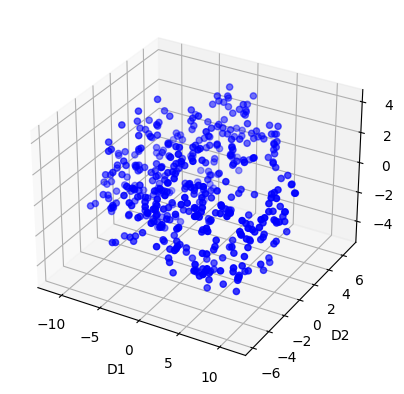

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c='b', marker= 'o')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
plt.show()

###2. UMAP

In [ ]:
umap_result = umap.UMAP(n_components=3).fit_transform(X_scaled)

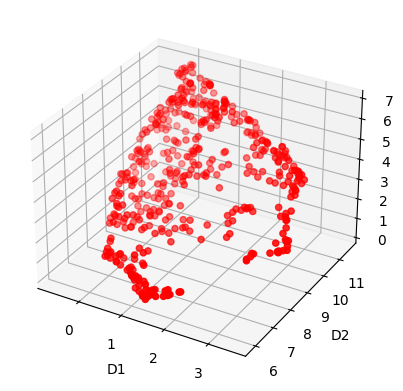

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2], c='r', marker= 'o')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
plt.show()

###3. Multidimensional Scaling (MDS)

In [ ]:
no_dimensions = 3
mds = MDS(n_components=no_dimensions, random_state=42)
X_mds = mds.fit_transform(X_scaled)
X_mds_df = pd.DataFrame(X_mds, columns=['MDS1', 'MDS2', 'MDS3'])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
X_mds_df.head()

,MDS1,MDS2,MDS3
0,5.470387,-10.408694,-2.572521
1,-2.426173,-2.743453,3.182808
2,2.184235,-4.540724,5.144099
3,7.368842,-8.568057,2.041560
4,8.702814,-7.551391,-0.739312


The resulting dataset `X_mds` after the transformation is an array where each row represents an observation (in our case, a player) and each column is one of the new dimensions (the components) created by MDS.

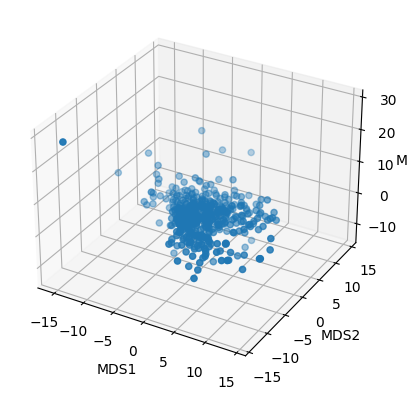

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mds[:, 0], X_mds[:, 1], X_mds[:, 2])

ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')
plt.savefig('mds_plot.png')
plt.show()

# **Compare the techniques**

Similarities:
1. Circular Clustering: Both t-SNE and MDS exhibit circular clustering, suggesting that the data points are organized in a circular or loop-like fashion in the reduced space, emphasizing their close local relationships.
2. Data Proximity: MDS and UMAP demonstrate data points that are closer to each other, indicating a similarity in preserving the local structure within the reduced dimensions.

Differences:
1. Cluster Formation: While t-SNE and MDS show data clustered in a circular manner, UMAP does not exhibit such a distinct circular cluster pattern. Instead, UMAP forms clusters that are not necessarily circular, implying a different approach to preserving the local and global structures of the data.
2. Predictability: Unlike t-SNE and MDS, UMAP's clustering allows for a better prediction of relationships between the obtained features, suggesting that UMAP might provide a more interpretable representation of the underlying data structure.
3. Data Condensation: In contrast to t-SNE and UMAP, MDS seems to have more condensed data points, indicating a higher level of proximity and potentially clearer separation of clusters, even when considering the presence of outliers.

# **Evaluate the best technique**

UMAP might be the most effective method for this particular dataset. Here's why:

1. **Cluster Interpretability:** UMAP allows for a better prediction of the relationships between the obtained features, suggesting that the clusters formed might be more interpretable and representative of the underlying data structure compared to t-SNE and MDS.

2. **Flexible Structure:** UMAP's ability to form clusters that are not necessarily circular indicates a flexibility in representing the local and global structures of the data, allowing for a more nuanced understanding of the data distribution.

3. **Data Condensation and Proximity:** The relatively condensed data points in UMAP, as well as the proximity of the data points, suggest that UMAP successfully retains the key structure of the data while minimizing information loss.

While t-SNE and MDS have their own advantages, UMAP seems to strike a balance between preserving local and global structures, ensuring interpretability, and maintaining proximity among data points, making it a strong candidate for effectively representing the underlying structure of the dataset.